<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


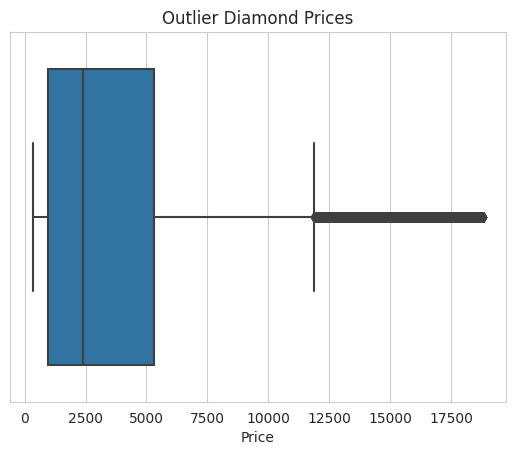

In [2]:
# gráfico do exercício 1

with sns.axes_style("whitegrid"):

  diamonds = sns.boxplot(x=data["price"])
  diamonds.set(title="Outlier Diamond Prices", xlabel="Price")

**Insight do gráfico 1**:

1. No gráfico dos preços dos diamantes mostra uma ampla variação, variando de 0 a 11.000, com a maioria dos valores concentrados na faixa de 0 a 5.500 unidades monetárias.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [3]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds = data[["price", "carat", "clarity"]]
diamonds.head()

,price,carat,clarity
0,326,0.23,SI2
1,326,0.21,SI1
2,327,0.23,VS1
3,334,0.29,VS2
4,335,0.31,SI2


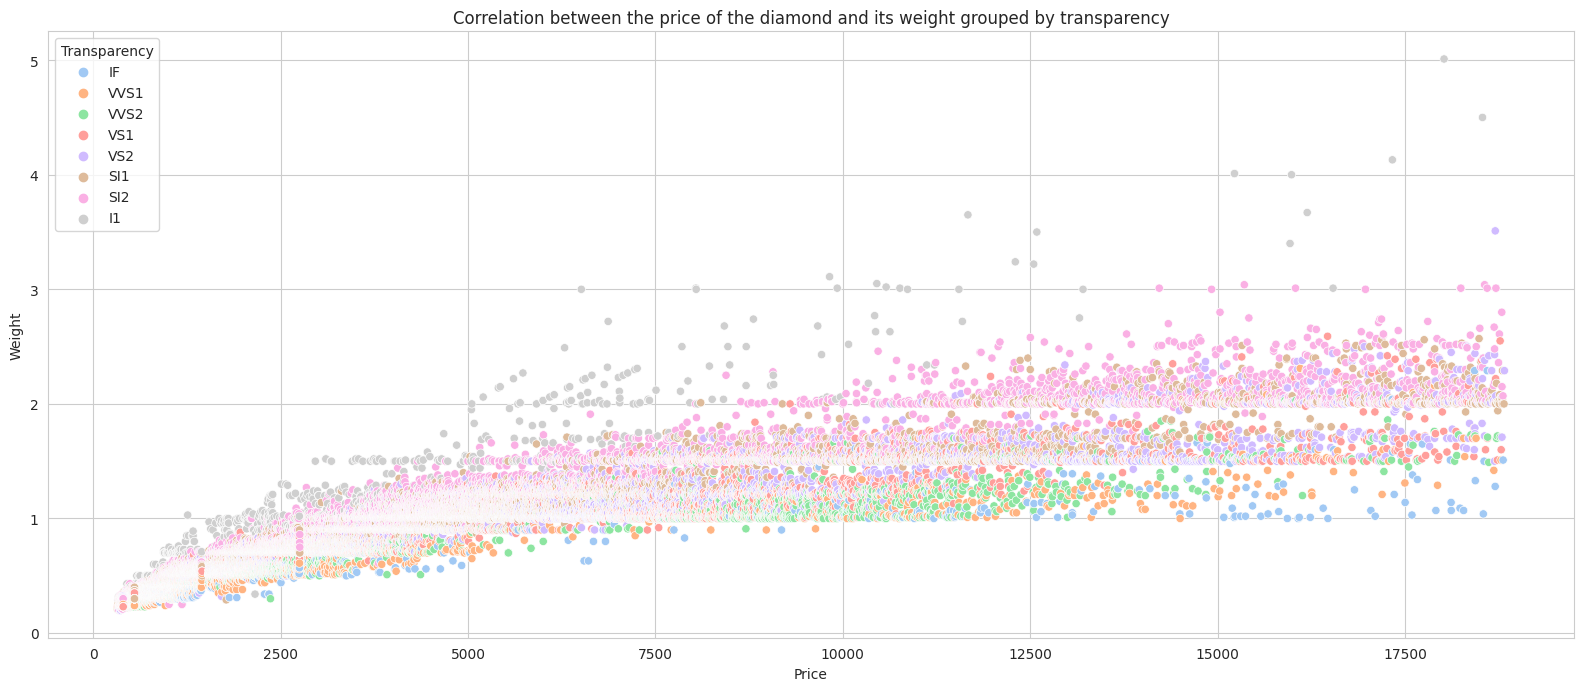

In [6]:
# gráfico do exercício 2

with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=diamonds, x="price", y="carat", hue="clarity", palette="pastel")
  grafico.set(title="Correlation between the price of the diamond and its weight grouped by transparency", xlabel="Price", ylabel="Weight")
  grafico.figure.set_size_inches(w=50/2.54, h=20/2.54)
  grafico.get_legend().set_title("Transparency")

**Insight do gráfico 2**:

1. "Existe uma tendência notável entre o peso do diamante e seu preço, especialmente para diamantes de alta clareza, classificados como 'IF', 'VVS1' e 'VVS2'. Diamantes com pesos menores tendem a ter preços mais altos nesses níveis de clareza. um dos motivos pode ser à raridade desses diamantes de alta qualidade em pesos menores.
2. No intervalo de peso entre 1,5 e 2,0, há uma tendência dos diamantes serem classificados em categorias de clareza ligeiramente inferiores, como 'VS1', 'VS2', 'SI1', 'SI2' e 'I1'. Isso pode ocorrer devido a diamantes dentro dessa faixa de peso podem ter mais inclusões visíveis a olho nu ou sob aumento de lupa, o que impacta negativamente na sua clareza.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [7]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


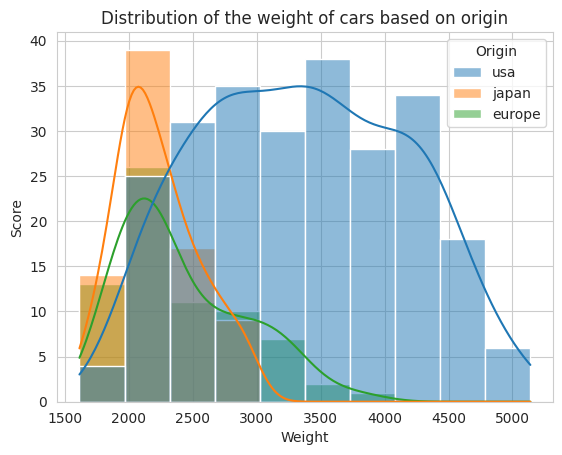

In [8]:
# gráfico do exercício 3

cars = data[["weight", "origin"]]

with sns.axes_style("whitegrid"):
  grafico = sns.histplot(data=cars, x="weight", hue="origin", kde=True)
  grafico.set(title="Distribution of the weight of cars based on origin", xlabel="Weight", ylabel="Score");
  grafico.get_legend().set_title("Origin");

**Insight do gráfico 3**:

1. Ao observar o gráfico, fica claro que carros com peso entre 1500 e 2000 kg são predominantemente de origem europeia ou japonesa. Essa tendência sugere que consumidores que buscam veículos mais leves tendem a preferir marcas europeias e japonesas.
2. A partir de 2500 kg, carros de origem americana assumem uma posição dominante, enquanto carros japoneses e europeus sofrem uma queda significativa, especialmente acima de 2000 kg. Essa mudança sugere uma preferência dos consumidores por carros americanos em faixas de peso mais pesadas, possivelmente devido à popularidade de veículos mais robustos e espaçosos, que são frequentemente associados a marcas americanas.

---